Since its introduction in 2017, the original Transformer model has inspired many new and exciting models that extend beyond natural language processing (NLP) tasks. There are models for predicting the folded structure of proteins, training a cheetah to run, and time series forecasting. With so many Transformer variants available, it can be easy to miss the bigger picture. What all these models have in common is they’re based on the original Transformer architecture. Some models only use the encoder or decoder, while others use both. This provides a useful taxonomy to categorize and examine the high-level differences within models in the Transformer family, and it’ll help you understand Transformers you haven’t encountered before.

If you aren’t familiar with the original Transformer model or need a refresher, check out the How do Transformers work chapter from the Hugging Face course.

Computer vision

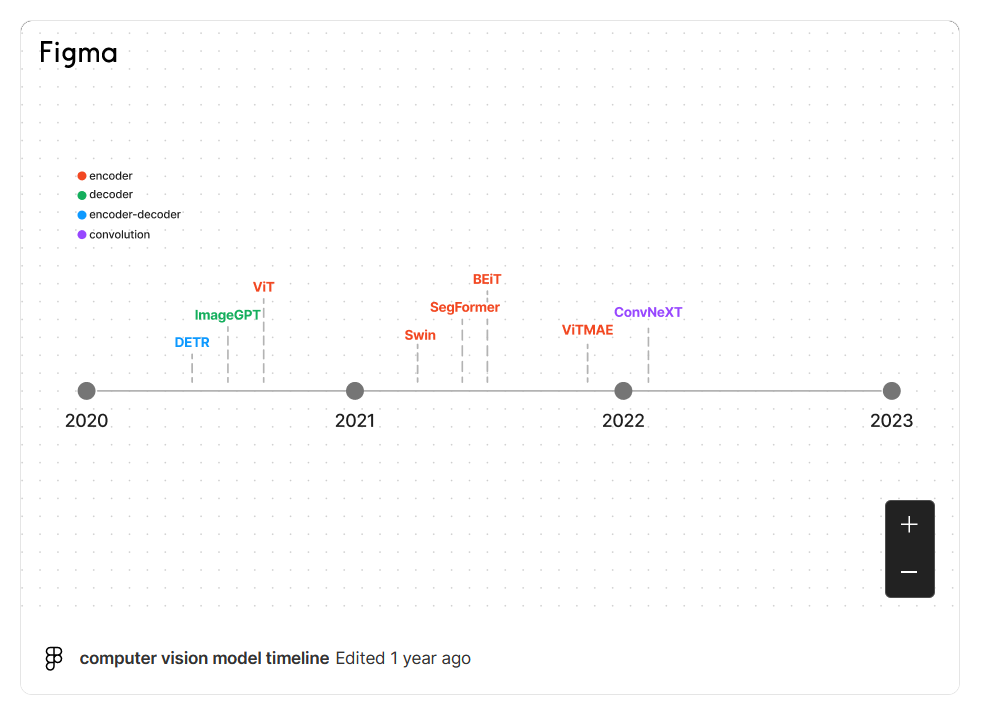

Convolutional network

For a long time, convolutional networks (CNNs) were the dominant paradigm for computer vision tasks until the Vision Transformer demonstrated its scalability and efficiency. Even then, some of a CNN’s best qualities, like translation invariance, are so powerful (especially for certain tasks) that some Transformers incorporate convolutions in their architecture. ConvNeXt flipped this exchange around and incorporated design choices from Transformers to modernize a CNN. For example, ConvNeXt uses non-overlapping sliding windows to patchify an image and a larger kernel to increase its global receptive field. ConvNeXt also makes several layer design choices to be more memory-efficient and improve performance, so it competes favorably with Transformers!
Encoder

The Vision Transformer (ViT) opened the door to computer vision tasks without convolutions. ViT uses a standard Transformer encoder, but its main breakthrough was how it treated an image. It splits an image into fixed-size patches and uses them to create an embedding, just like how a sentence is split into tokens. ViT capitalized on the Transformers’ efficient architecture to demonstrate competitive results with the CNNs at the time while requiring fewer resources to train. ViT was soon followed by other vision models that could also handle dense vision tasks like segmentation as well as detection.

One of these models is the Swin Transformer. It builds hierarchical feature maps (like a CNN 👀 and unlike ViT) from smaller-sized patches and merges them with neighboring patches in deeper layers. Attention is only computed within a local window, and the window is shifted between attention layers to create connections to help the model learn better. Since the Swin Transformer can produce hierarchical feature maps, it is a good candidate for dense prediction tasks like segmentation and detection. The SegFormer also uses a Transformer encoder to build hierarchical feature maps, but it adds a simple multilayer perceptron (MLP) decoder on top to combine all the feature maps and make a prediction.

Other vision models, like BeIT and ViTMAE, drew inspiration from BERT’s pretraining objective. BeIT is pretrained by masked image modeling (MIM); the image patches are randomly masked, and the image is also tokenized into visual tokens. BeIT is trained to predict the visual tokens corresponding to the masked patches. ViTMAE has a similar pretraining objective, except it must predict the pixels instead of visual tokens. What’s unusual is 75% of the image patches are masked! The decoder reconstructs the pixels from the masked tokens and encoded patches. After pretraining, the decoder is thrown away, and the encoder is ready to be used in downstream tasks.
Decoder

Decoder-only vision models are rare because most vision models rely on an encoder to learn an image representation. But for use cases like image generation, the decoder is a natural fit, as we’ve seen from text generation models like GPT-2. ImageGPT uses the same architecture as GPT-2, but instead of predicting the next token in a sequence, it predicts the next pixel in an image. In addition to image generation, ImageGPT could also be finetuned for image classification.
Encoder-decoder

Vision models commonly use an encoder (also known as a backbone) to extract important image features before passing them to a Transformer decoder. DETR has a pretrained backbone, but it also uses the complete Transformer encoder-decoder architecture for object detection. The encoder learns image representations and combines them with object queries (each object query is a learned embedding that focuses on a region or object in an image) in the decoder. DETR predicts the bounding box coordinates and class label for each object query.


Natural language processing

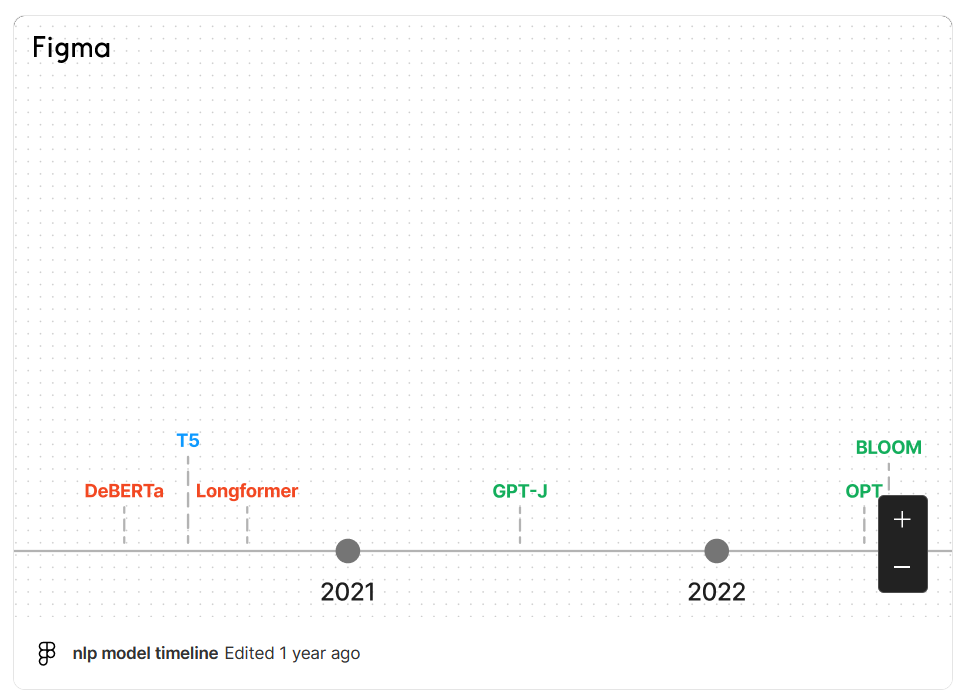

Encoder

BERT is an encoder-only Transformer that randomly masks certain tokens in the input to avoid seeing other tokens, which would allow it to “cheat”. The pretraining objective is to predict the masked token based on the context. This allows BERT to fully use the left and right contexts to help it learn a deeper and richer representation of the inputs. However, there was still room for improvement in BERT’s pretraining strategy. RoBERTa improved upon this by introducing a new pretraining recipe that includes training for longer and on larger batches, randomly masking tokens at each epoch instead of just once during preprocessing, and removing the next-sentence prediction objective.

The dominant strategy to improve performance is to increase the model size. But training large models is computationally expensive. One way to reduce computational costs is using a smaller model like DistilBERT. DistilBERT uses knowledge distillation - a compression technique - to create a smaller version of BERT while keeping nearly all of its language understanding capabilities.

However, most Transformer models continued to trend towards more parameters, leading to new models focused on improving training efficiency. ALBERT reduces memory consumption by lowering the number of parameters in two ways: separating the larger vocabulary embedding into two smaller matrices and allowing layers to share parameters. DeBERTa added a disentangled attention mechanism where the word and its position are separately encoded in two vectors. The attention is computed from these separate vectors instead of a single vector containing the word and position embeddings. Longformer also focused on making attention more efficient, especially for processing documents with longer sequence lengths. It uses a combination of local windowed attention (attention only calculated from fixed window size around each token) and global attention (only for specific task tokens like [CLS] for classification) to create a sparse attention matrix instead of a full attention matrix.
Decoder

GPT-2 is a decoder-only Transformer that predicts the next word in the sequence. It masks tokens to the right so the model can’t “cheat” by looking ahead. By pretraining on a massive body of text, GPT-2 became really good at generating text, even if the text is only sometimes accurate or true. But GPT-2 lacked the bidirectional context from BERT’s pretraining, which made it unsuitable for certain tasks. XLNET combines the best of both BERT and GPT-2’s pretraining objectives by using a permutation language modeling objective (PLM) that allows it to learn bidirectionally.

After GPT-2, language models grew even bigger and are now known as large language models (LLMs). LLMs demonstrate few- or even zero-shot learning if pretrained on a large enough dataset. GPT-J is an LLM with 6B parameters and trained on 400B tokens. GPT-J was followed by OPT, a family of decoder-only models, the largest of which is 175B and trained on 180B tokens. BLOOM was released around the same time, and the largest model in the family has 176B parameters and is trained on 366B tokens in 46 languages and 13 programming languages.
Encoder-decoder

BART keeps the original Transformer architecture, but it modifies the pretraining objective with text infilling corruption, where some text spans are replaced with a single mask token. The decoder predicts the uncorrupted tokens (future tokens are masked) and uses the encoder’s hidden states to help it. Pegasus is similar to BART, but Pegasus masks entire sentences instead of text spans. In addition to masked language modeling, Pegasus is pretrained by gap sentence generation (GSG). The GSG objective masks whole sentences important to a document, replacing them with a mask token. The decoder must generate the output from the remaining sentences. T5 is a more unique model that casts all NLP tasks into a text-to-text problem using specific prefixes. For example, the prefix Summarize: indicates a summarization task. T5 is pretrained by supervised (GLUE and SuperGLUE) training and self-supervised training (randomly sample and drop out 15% of tokens).

Audio

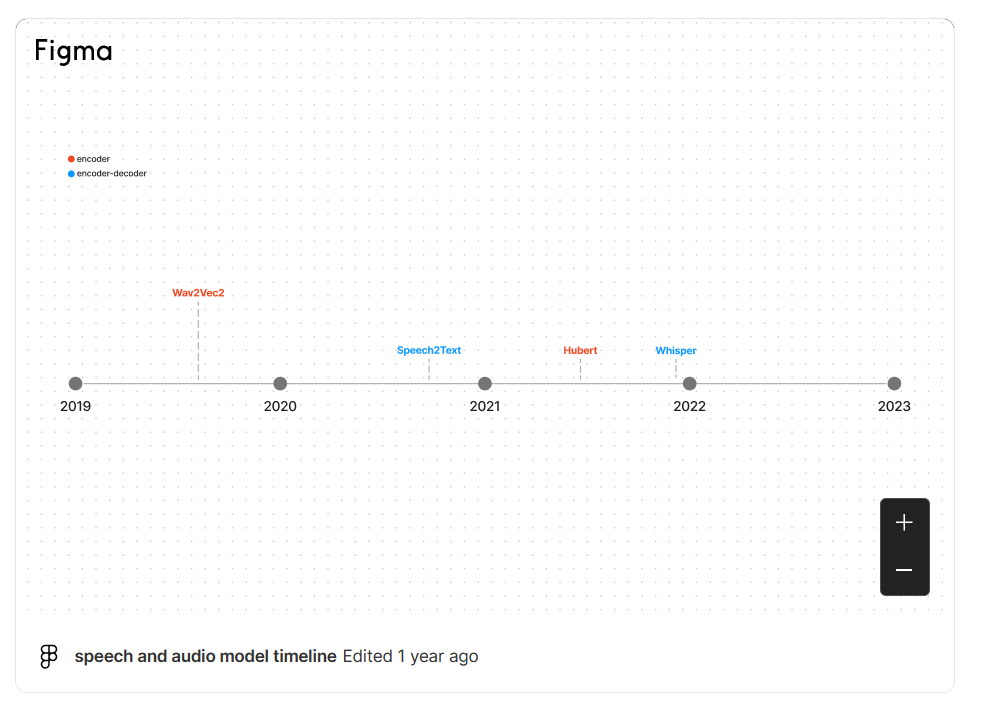

Encoder

Wav2Vec2 uses a Transformer encoder to learn speech representations directly from raw audio waveforms. It is pretrained with a contrastive task to determine the true speech representation from a set of false ones. HuBERT is similar to Wav2Vec2 but has a different training process. Target labels are created by a clustering step in which segments of similar audio are assigned to a cluster which becomes a hidden unit. The hidden unit is mapped to an embedding to make a prediction.
Encoder-decoder

Speech2Text is a speech model designed for automatic speech recognition (ASR) and speech translation. The model accepts log mel-filter bank features extracted from the audio waveform and pretrained autoregressively to generate a transcript or translation. Whisper is also an ASR model, but unlike many other speech models, it is pretrained on a massive amount of ✨ labeled ✨ audio transcription data for zero-shot performance. A large chunk of the dataset also contains non-English languages, meaning Whisper can also be used for low-resource languages. Structurally, Whisper is similar to Speech2Text. The audio signal is converted to a log-mel spectrogram encoded by the encoder. The decoder generates the transcript autoregressively from the encoder’s hidden states and the previous tokens.

Multimodal

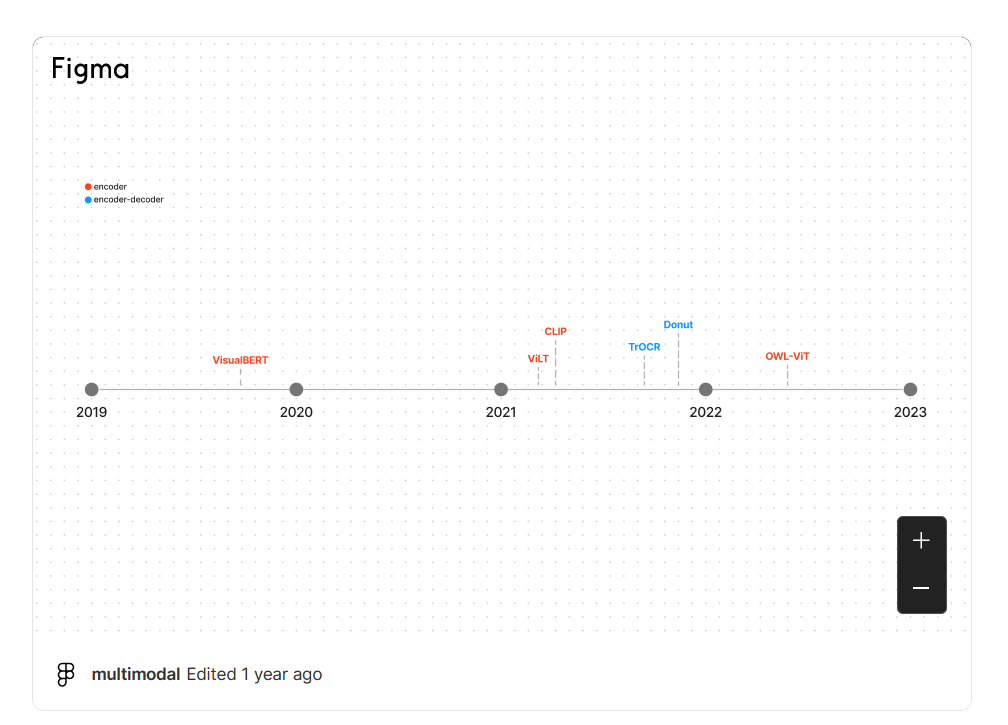

Encoder

VisualBERT is a multimodal model for vision-language tasks released shortly after BERT. It combines BERT and a pretrained object detection system to extract image features into visual embeddings, passed alongside text embeddings to BERT. VisualBERT predicts the masked text based on the unmasked text and the visual embeddings, and it also has to predict whether the text is aligned with the image. When ViT was released, ViLT adopted ViT in its architecture because it was easier to get the image embeddings this way. The image embeddings are jointly processed with the text embeddings. From there, ViLT is pretrained by image text matching, masked language modeling, and whole word masking.

CLIP takes a different approach and makes a pair prediction of (image, text) . An image encoder (ViT) and a text encoder (Transformer) are jointly trained on a 400 million (image, text) pair dataset to maximize the similarity between the image and text embeddings of the (image, text) pairs. After pretraining, you can use natural language to instruct CLIP to predict the text given an image or vice versa. OWL-ViT builds on top of CLIP by using it as its backbone for zero-shot object detection. After pretraining, an object detection head is added to make a set prediction over the (class, bounding box) pairs.
Encoder-decoder

Optical character recognition (OCR) is a long-standing text recognition task that typically involves several components to understand the image and generate the text. TrOCR simplifies the process using an end-to-end Transformer. The encoder is a ViT-style model for image understanding and processes the image as fixed-size patches. The decoder accepts the encoder’s hidden states and autoregressively generates text. Donut is a more general visual document understanding model that doesn’t rely on OCR-based approaches. It uses a Swin Transformer as the encoder and multilingual BART as the decoder. Donut is pretrained to read text by predicting the next word based on the image and text annotations. The decoder generates a token sequence given a prompt. The prompt is represented by a special token for each downstream task. For example, document parsing has a special parsing token that is combined with the encoder hidden states to parse the document into a structured output format (JSON).

 Reinforcement learning

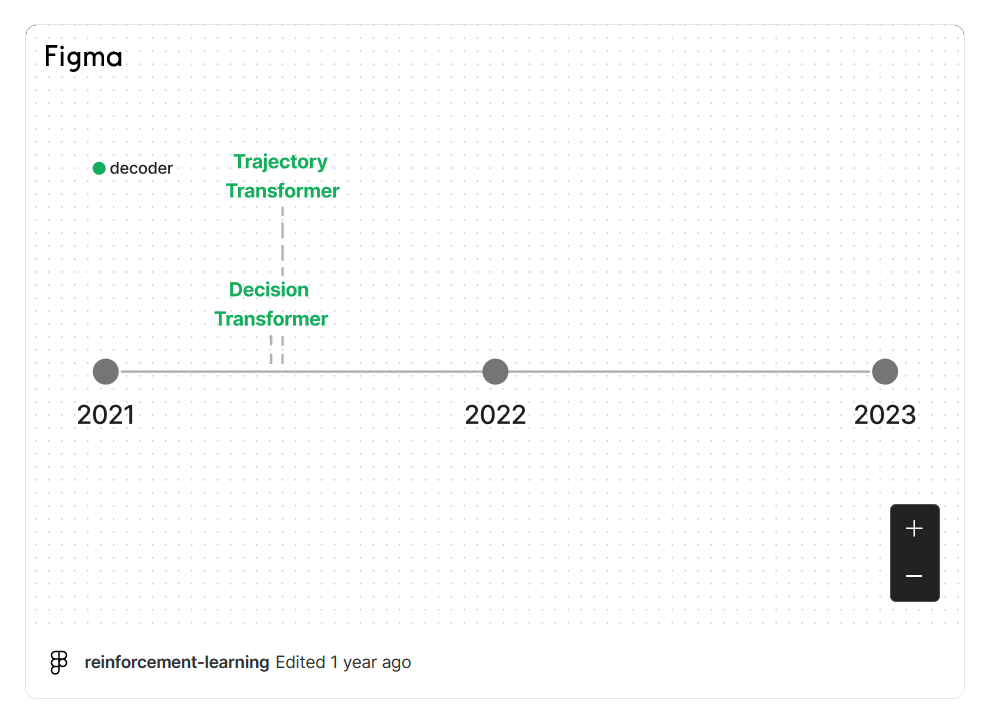

Decoder

The Decision and Trajectory Transformer casts the state, action, and reward as a sequence modeling problem. The Decision Transformer generates a series of actions that lead to a future desired return based on returns-to-go, past states, and actions. For the last K timesteps, each of the three modalities are converted into token embeddings and processed by a GPT-like model to predict a future action token. Trajectory Transformer also tokenizes the states, actions, and rewards and processes them with a GPT architecture. Unlike the Decision Transformer, which is focused on reward conditioning, the Trajectory Transformer generates future actions with beam search.